# Introduction to regression with neural networks in tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number


In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


## creating data to view and fit

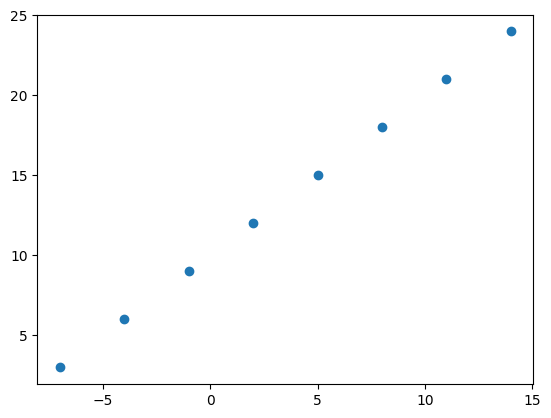

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and output shapes

In [4]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
"""## OLD
# Fit the model
model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
 
## New
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line

This happens because model.fit() no longer automatically upscales 
inputs from shape (batch_size, ) to (batch_size, 1)."""

'## OLD\n# Fit the model\nmodel.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+\n \n## New\n# Fit the model\nmodel.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line\n\nThis happens because model.fit() no longer automatically upscales \ninputs from shape (batch_size, ) to (batch_size, 1).'

In [11]:
# turn our numpy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

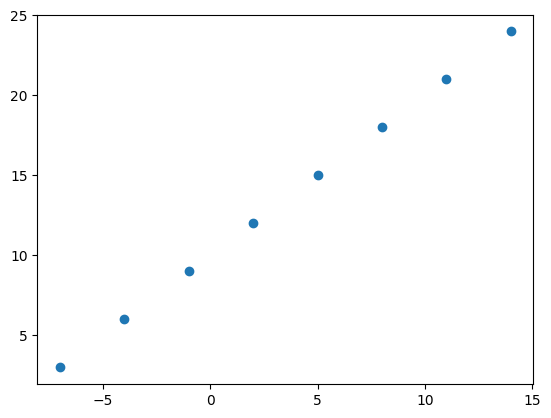

In [13]:
plt.scatter(X, y)

## steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **compiling a model** - define the loss function (in other words, the funciton which tells our model how wront it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **fitting a model** -0 letting the model try to find patterns between X & y (features and labels)

In [14]:
# set random seed 
tf.random.set_seed(42)

# 1. create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 13.3095 - mae: 13.3095
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 13.1770 - mae: 13.1770
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 13.0445 - mae: 13.0445
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 12.9120 - mae: 12.9120
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 12.7795 - mae: 12.7795


In [15]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])

1/1 [==============================] - 0s 166ms/step


In [17]:
y_pred + 11

array([[14.9502125]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (allso called neurons) within each of the hidden layers, change the activation function of each later
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epichs** (leave it training of rlonger) or more data (give the model more examples to learn from)

In [18]:
# let's rebuild our model

# 1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.4093 - mae: 13.4093
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.3615 - mae: 13.3615
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 13.3122 - mae: 13.3122
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 13.2608 - mae: 13.2608
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 13.2066 - mae: 13.2066
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 13.1492 - mae: 13.1492
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0877 - mae: 13.0877
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 13.0215 - mae: 13.0215
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9498 - mae: 12.9498
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8716 - mae: 12.8716
Epoch 11/100
1/1 [==============================] -

In [19]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# let's see if out model's prediction has improved
model.predict([17.9])

1/1 [==============================] - 0s 101ms/step


array([[31.747202]], dtype=float32)

In [21]:
# let's see if we can make another change to improve our model

# 1. create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.0251 - mae: 13.0251
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.2964 - mae: 12.2964
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5685 - mae: 11.5685
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8388 - mae: 10.8388
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.1048 - mae: 10.1048
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.3639 - mae: 9.3639
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 8.6135 - mae: 8.6135
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 7.8503 - mae: 7.8503
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.0715 - mae: 7.0715
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.7976 - mae: 6.7976
Epoch 11/100
1/1 [==============================] - 0s 13ms/st

In [22]:
# let's rem ind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 249ms/step


array([[26.666552]], dtype=float32)

## common ways to improve a deep model:
* adding layers
* increase the number of hidden units
* change the activation functions
* change the optimization function
* change the learning rate (commonly the most important one)
* fitting for longer

## Evaluating a model

In practice, a typicall workflow you'll go through when building neural networks is:

build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...

when it comes to evaluation... there are 3 words you should memorize:
> "visualize, visualize, visualize"

It's a good idea to visualize:
* the data- what data are we wroking with? what does it look like?
* the model itself - what does our model look like?
* the training of a model - how does a model perform while it learns?
* the predictions of the model - how do the predictions of a model line up agains the ground truth (the origginal labels?)

In [24]:
 # make a bigger dataset 
 X = tf.range(-100, 100, 4)
 X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# make labels fot the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

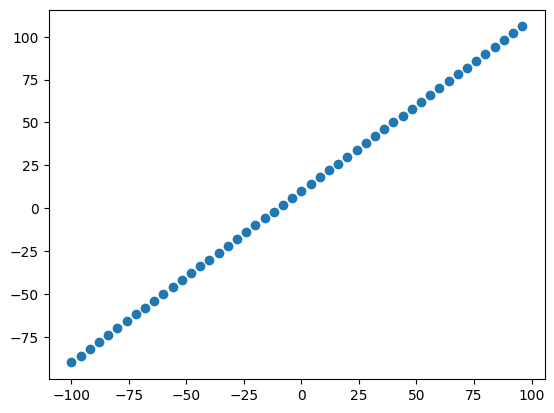

In [26]:
# visualize the data 
import matplotlib.pyplot as plt
plt.scatter(X, y)

### the 3 sets...

* **training set** - the model learns from this data, which is typically 70-80 % of the total data you have available
* **validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **test set** -0 the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

In [27]:
# check the length of how many samples we have
len(X)

50

In [28]:
# split the data into train and test sets
X_train =  X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]
X_test = X[40:] # las 10 are testing samples (20% od the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### visualizing the data

now we've got our data in training and test sets... let's visualize it again!

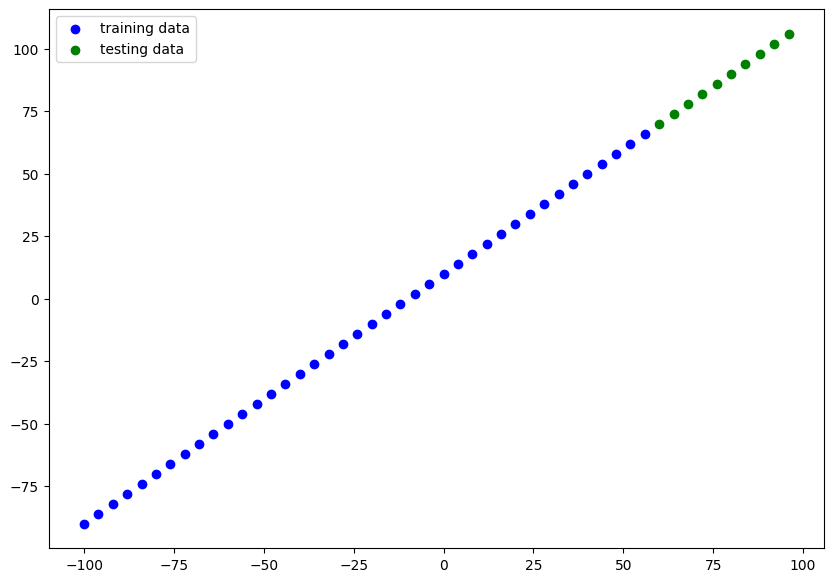

In [29]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="training data")
# plot test data in green
plt.scatter(X_test, y_test, c="g", label="testing data")
# show a legend
plt.legend()

In [30]:
# let's have a look at how to build a neural network for our data

# 1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
# model.fit(X_train, y_train, epochs=100)

### visualizing the model

In [31]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [32]:
# let's create a model which builds automatically by defining the input_shape argument in the first layer

# if we don't define the input_shape, it will throw an error: ValueError: This model has not been built yet. build the model first by calling "build()",
# or calling "fit()" with some data, or specify an input_shape argument in the first layer(s) for automatic build.

tf.random.set_seed(42)

# 1. create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* total params - total number of parameters in the model
* trainable parameters - these are the parameters (patterns) the model can update as it trains.
* non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

**resource:** for a more in-depth overview of the trainable parameteres within a layer, check out MIT's introduction to deep learning video

**axercise:** try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling model.summary()

how a neuron works notes:
* dot product between the X vector (inputs) and the W vector (weights)
* sum de bias
* apply the non-linear activacion function

In [34]:
# let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [35]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


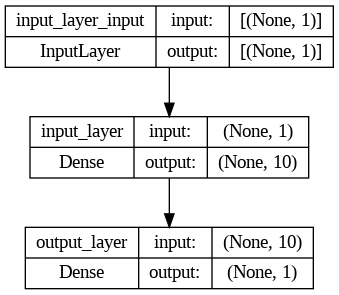

In [36]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### visualizing our model's predictions

to visualize predictions, it's a good idea to plot them against the ground truth labels.

often you'll see this in the form of "y_test" or "y_true" versus "y_pred" (ground truth versus your model predictions)

In [37]:
# make some predictons
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 46ms/step


array([[ 70.40334 ],
       [ 74.98263 ],
       [ 79.561905],
       [ 84.14119 ],
       [ 88.72047 ],
       [ 93.29975 ],
       [ 97.87902 ],
       [102.4583  ],
       [107.03758 ],
       [111.61687 ]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionallity in the future, it's a good idea to turn it into a function

In [39]:
# let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots trining data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # plot trining data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show the legend
  plt.legend()

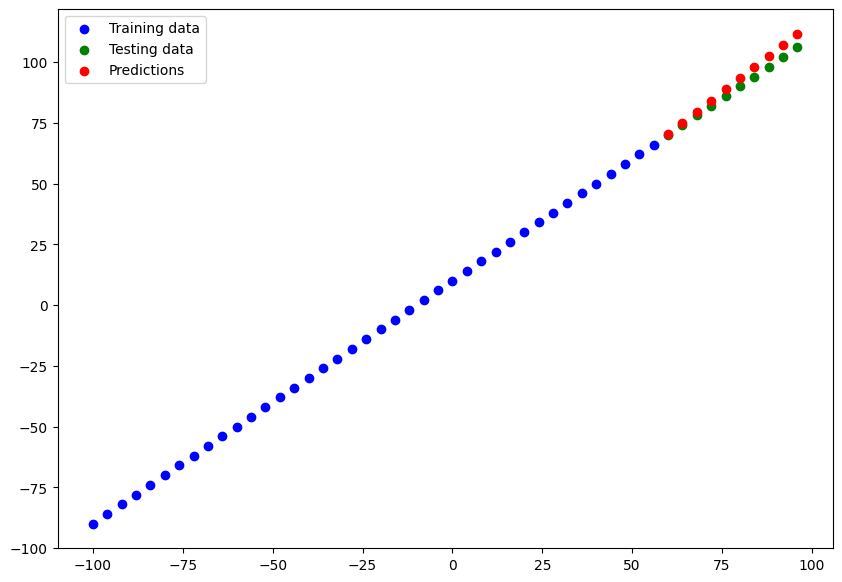

In [40]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's preformance

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [41]:
# evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 140ms/step - loss: 3.0101 - mae: 3.0101


[3.0101051330566406, 3.0101051330566406]

In [42]:
# calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.677326, 14.210423, 11.775238, 10.371762, 10.      , 10.65995 ,
       12.351608, 15.166638, 19.037582, 23.616867], dtype=float32)>

In [43]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.40334 ],
       [ 74.98263 ],
       [ 79.561905],
       [ 84.14119 ],
       [ 88.72047 ],
       [ 93.29975 ],
       [ 97.87902 ],
       [102.4583  ],
       [107.03758 ],
       [111.61687 ]], dtype=float32)>

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.40334 ,  74.98263 ,  79.561905,  84.14119 ,  88.72047 ,
        93.29975 ,  97.87902 , 102.4583  , 107.03758 , 111.61687 ],
      dtype=float32)>

In [46]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.0101051>

In [47]:
# calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.829143>

In [48]:
# make some functions to reuse MAE and MSE 
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relatinoships between features and labels).
2. make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. train ofr longer - give your model more of a chance to find patterns in the data

let's do 3 modelling experimients:

1. `model_1` - same as the original model, 1 layer, but trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [49]:
# set random seed for reproducebility
tf.random.set_seed(42)

# 1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 22ms/step - loss: 19.8109 - mae: 19.8109
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8905 - mae: 10.8905
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.6040 - mae: 11.6040
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.3753 - mae: 9.3753
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2564 - mae: 10.2564
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5077 - mae: 9.5077
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6344 - mae: 8.6344
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0451 - mae: 9.0451
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.9206 - mae: 18.9206
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2049 - mae: 10.2049
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

1/1 [==============================] - 0s 45ms/step


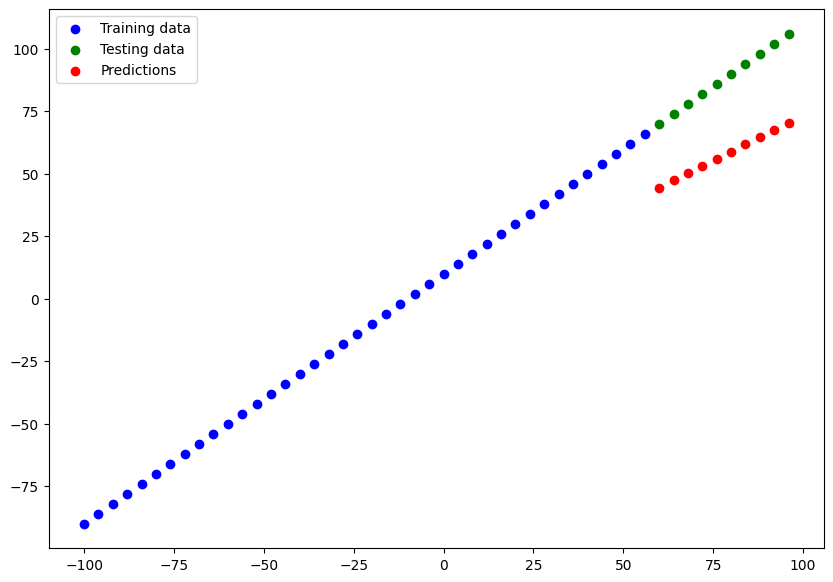

In [50]:
# make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [51]:
# calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.567633>,
 <tf.Tensor: shape=(), dtype=float32, numpy=944.7664>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [52]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 46.3663 - mse: 3124.7183
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 34.2295 - mse: 1681.8655
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 30.4535 - mse: 1392.7291
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 16.4304 - mse: 392.9682
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 22.4407 - mse: 737.3088
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.3435 - mse: 144.1947
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.4164 - mse: 200.3000
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0403 - mse: 143.2566
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 39.2443 - mse: 2400.3843
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 26.7943 - mse: 1009.3703
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 50ms/step


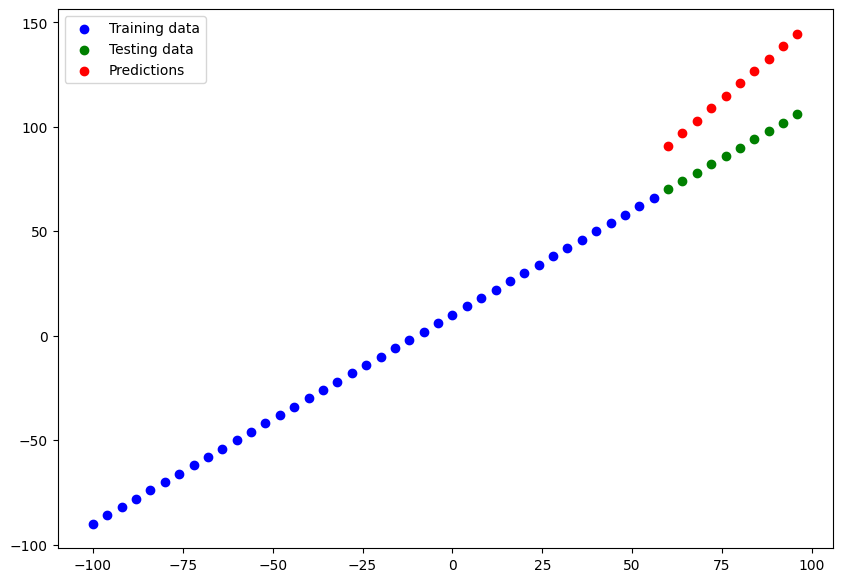

In [53]:
# make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [54]:
# calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.756525>,
 <tf.Tensor: shape=(), dtype=float32, numpy=916.60974>)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [55]:
# set random seed
tf.random.set_seed(42)

# 1. create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 15ms/step - loss: 55.8329 - mse: 4936.6064
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 11.6620 - mse: 210.6834
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 31.0435 - mse: 1416.2463
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 14.5245 - mse: 282.5754
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 20.5495 - mse: 577.3060
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 8.1821 - mse: 90.9478
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 17.1873 - mse: 377.3373
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 17.1741 - mse: 432.9290
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 30.1060 - mse: 1237.2913
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 12.2047 - mse: 199.1740
Epoch 11/500
2/2 [=============================

1/1 [==============================] - 0s 60ms/step


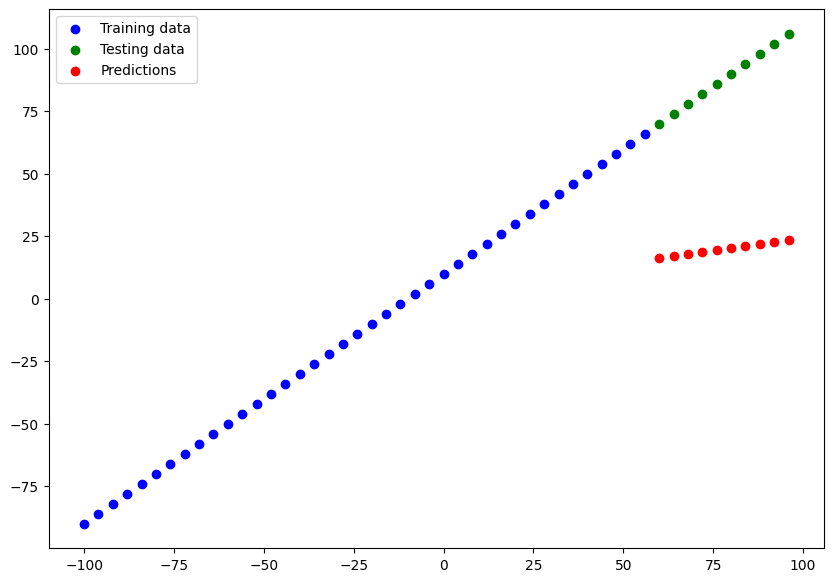

In [56]:
# make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [57]:
# calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.94959>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4701.8364>)

**Note:** you want to start with small (small models) experiments and make sure they work and then increase their scale when necessary.

## compating the results of our experiments

we've run a few experiments, let's compare the results

In [58]:
# let's compare our model's results using a pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.567633,944.766418
1,model_2,29.756525,916.609741
2,model_3,67.949593,4701.836426


Looks like `model_2` performed the best...

In [59]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** one of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out whichc don't work and in turn, get closer to figuring out what does work. remember, the machine learning pracioner's motto: "experiment, experiment, experiment"

## tracking your experiments

one really good habit in machine leraning modelling is to track the results of your experiments.

and when doing so, it can be tedious if you're running lots of experiments.

luckily, there are tools to help up!

**resource:** as you build more models, you'll want to look into using:

* tensorboard - a component of the tensorflow library to help track modelling experiments (we'll see this one later).
* weights & biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into tensorboard).

## saving our models

saving our models allows us to use the outside of google collab (or wherever they were trained) such as in a web application or a mobile app

there are two main formats we can save our model's too:
1. the SavedModel format
2. the HDF5 format

In [60]:
# save model using the SavedModel format
model_2.save("best_model_SavedModel_format") 

In [61]:
# save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") 

## loading in a saved model

In [62]:
# load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [64]:
# compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 51ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [65]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [66]:
model_2_preds.squeeze()

array([ 91.01116 ,  96.95457 , 102.89799 , 108.84141 , 114.78481 ,
       120.728226, 126.67164 , 132.61507 , 138.55847 , 144.50189 ],
      dtype=float32)

In [67]:
loaded_SavedModel_format_preds.squeeze()

array([ 91.01116 ,  96.95457 , 102.89799 , 108.84141 , 114.78481 ,
       120.728226, 126.67164 , 132.61507 , 138.55847 , 144.50189 ],
      dtype=float32)

In [68]:
# load in a model using the .h5 format 
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [70]:
# check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 43ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## download a model (or any other file) from google collab

if you want to download your files from google collab:

1. you can go to the "files" tab and right click on the file y ou're after and click "download"

2. use code (see the cell below).

3. save it to google drive by connecting google drive and copying it there (see 2nd code cell bellow)

In [71]:
# download a file from google collab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
# save a file from google colab to google drive (requires mounting google drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflowcourse

In [73]:
!ls /content/drive/MyDrive/tensorflowcourse

00_tensorflow_fundamentals.ipynb	 best_model_HDF5_format.h5
01_neural_network_with_tensorflow.ipynb


## a larger example

In [74]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [75]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
# read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [77]:
# let's try one-hot encode our dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [78]:
# create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [79]:
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [80]:
# view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [81]:
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [82]:
# build a neural network (sort of like the model_2 above)
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. fit the model
insurance_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 8592.7852 - mae: 8592.7852
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 7886.5542 - mae: 7886.5542
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 7531.8970 - mae: 7531.8970
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 7692.6553 - mae: 7692.6553
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 7673.5020 - mae: 7673.5020
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 7601.8857 - mae: 7601.8857
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 7577.3486 - mae: 7577.3486
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7693.5566 - mae: 7693.5566
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7592.0425 - mae: 7592.0425
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7760.4580 - mae: 7760.4580

In [83]:
# check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5756.5161 - mae: 5756.5161


[5756.51611328125, 5756.51611328125]

In [84]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

right now it look like our model isn't performing too well... let's try and improve it!

to (try) improve our model, we'll run 2 experiments:
1. add en extra layer with more hidden units and use the adam optimizer
2. train for longer

In [85]:
# set random seed
tf.random.set_seed(42)

# 1. create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13288.5869 - mae: 13288.5869
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13098.8477 - mae: 13098.8477
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12706.4746 - mae: 12706.4746
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 11956.9189 - mae: 11956.9189
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10742.7822 - mae: 10742.7822
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9258.8584 - mae: 9258.8584
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7981.9409 - mae: 7981.9409
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7465.5234 - mae: 7465.5234
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7394.8740 - mae: 7394.8740
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7374.8960 - mae:

In [86]:
# evaluate the larger model 
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4682.3774 - mae: 4682.3774


[4682.37744140625, 4682.37744140625]

In [87]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5756.5161 - mae: 5756.5161


[5756.51611328125, 5756.51611328125]

In [88]:
# set random seed
tf.random.set_seed(42)

# early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# 1. create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, callbacks=[callback])

Epoch 1/200
34/34 [==============================] - 1s 5ms/step - loss: 13241.9355 - mae: 13241.9355
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13002.8496 - mae: 13002.8496
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12536.4238 - mae: 12536.4238
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 11684.6768 - mae: 11684.6768
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 10384.3506 - mae: 10384.3506
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 8904.1260 - mae: 8904.1260
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 7780.1338 - mae: 7780.1338
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7444.1675 - mae: 7444.1675
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 7402.3970 - mae: 7402.3970
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7382.0371 - mae:

In [89]:
# evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3613.0339 - mae: 3613.0339


[3613.033935546875, 3613.033935546875]

In [90]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5756.5161 - mae: 5756.5161


[5756.51611328125, 5756.51611328125]

Text(0.5, 0, 'epochs')

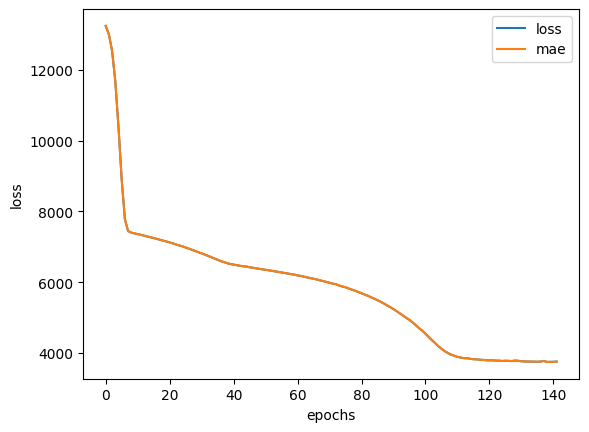

In [91]:
# plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**question** how long should you train for?

id depends. really... it depends on the problem you're working on. However, many people have asked this question before... so tensorflow has a solution, it's called the earlystopping callback, which is a tensorflow component you can add to your model to stop training once it stops improving a certain metric.

Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

if you're not sure on which to use, you could use both and see which performs better.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


to prepare our data, we can borrow a few classes from scikit-learn

In [93]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the column transformer to our training data
ct.fit(X_train)

# transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [94]:
# what does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [95]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [96]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

our data has been normalized and one hot encoded.
now let's build a neural network model

In [97]:
# set random seet
tf.random.set_seed(42)

# set early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

# 1. create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. fit the model
history = insurance_model.fit(X_train_normal, y_train, epochs=300, callbacks=[callback])

Epoch 1/300
34/34 [==============================] - 1s 3ms/step - loss: 13343.1357 - mae: 13343.1357
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 13333.2793 - mae: 13333.2793
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 13309.8789 - mae: 13309.8789
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 13262.3242 - mae: 13262.3242
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 13179.7500 - mae: 13179.7500
Epoch 6/300
34/34 [==============================] - 0s 3ms/step - loss: 13051.0049 - mae: 13051.0049
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 12865.1406 - mae: 12865.1406
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 12611.9473 - mae: 12611.9473
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 12281.4014 - mae: 12281.4014
Epoch 10/300
34/34 [==============================] - 0s 3ms/step - loss: 11870.92

In [98]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3161.7888 - mae: 3161.7888


[3161.788818359375, 3161.788818359375]

In [ ]:
# insurance model 2 results
# 9/9 [==============================] - 0s 2ms/step - loss: 4979.5762 - mae: 4979.5762
# [4979.576171875, 4979.576171875]

In [151]:
# create features
X = np.array(range(-7, 130, 3))

# create labels
y = np.array(X + 10)

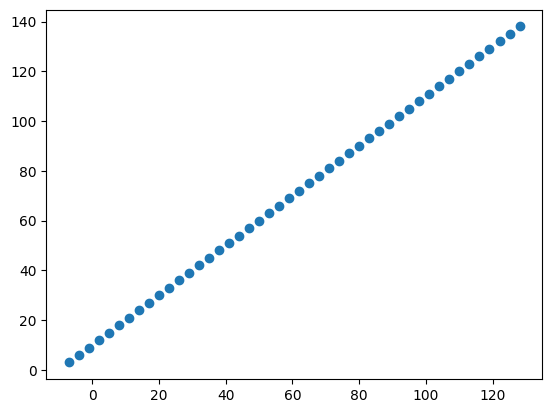

In [152]:
plt.scatter(X, y)

In [153]:
len(X), len(y)

(46, 46)

In [154]:
X_train = X[:36]
y_train = y[:36]
X_test = X[36:]
y_test = y[36:]

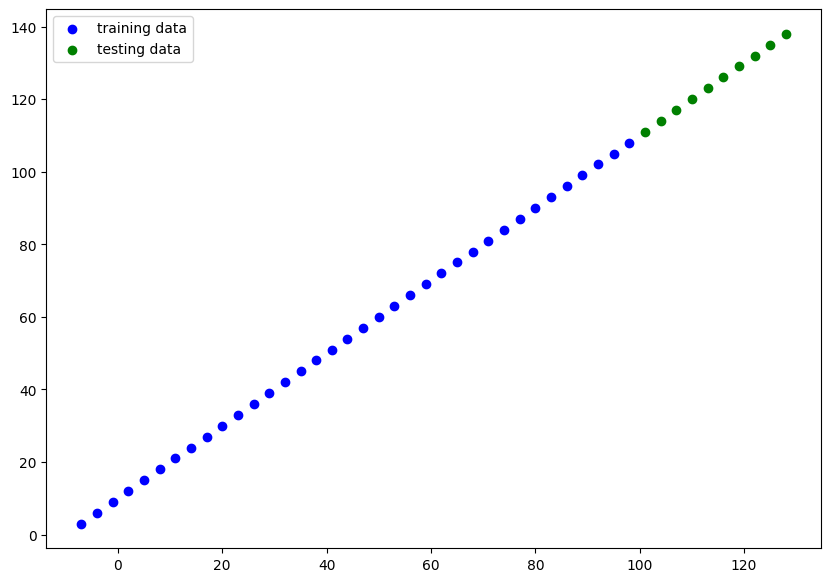

In [155]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="training data")
plt.scatter(X_test, y_test, c="g", label="testing data")
plt.legend()

In [175]:
# setear random seed
tf.random.set_seed(42)

# callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# 1. crear model
modelo_ejercicio = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compilar modelo
modelo_ejercicio.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                         metrics=["mae"])

# 3. ajustar modelo
modelo_ejercicio.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=400, callbacks=[callback])

Epoch 1/400
2/2 [==============================] - 2s 13ms/step - loss: 73.2101 - mae: 73.2101
Epoch 2/400
2/2 [==============================] - 0s 8ms/step - loss: 54.5746 - mae: 54.5746
Epoch 3/400
2/2 [==============================] - 0s 8ms/step - loss: 38.4199 - mae: 38.4199
Epoch 4/400
2/2 [==============================] - 0s 7ms/step - loss: 20.8834 - mae: 20.8834
Epoch 5/400
2/2 [==============================] - 0s 15ms/step - loss: 5.0452 - mae: 5.0452
Epoch 6/400
2/2 [==============================] - 0s 8ms/step - loss: 15.4447 - mae: 15.4447
Epoch 7/400
2/2 [==============================] - 0s 7ms/step - loss: 14.2893 - mae: 14.2893
Epoch 8/400
2/2 [==============================] - 0s 8ms/step - loss: 7.3189 - mae: 7.3189
Epoch 9/400
2/2 [==============================] - 0s 7ms/step - loss: 7.1018 - mae: 7.1018
Epoch 10/400
2/2 [==============================] - 0s 8ms/step - loss: 9.0783 - mae: 9.0783


In [176]:
modelo_ejercicio.evaluate(X_test, y_test)

1/1 [==============================] - 0s 115ms/step - loss: 1.8123 - mae: 1.8123


[1.8123153448104858, 1.8123153448104858]

In [177]:
predictions = modelo_ejercicio.predict(X_test)

1/1 [==============================] - 0s 84ms/step


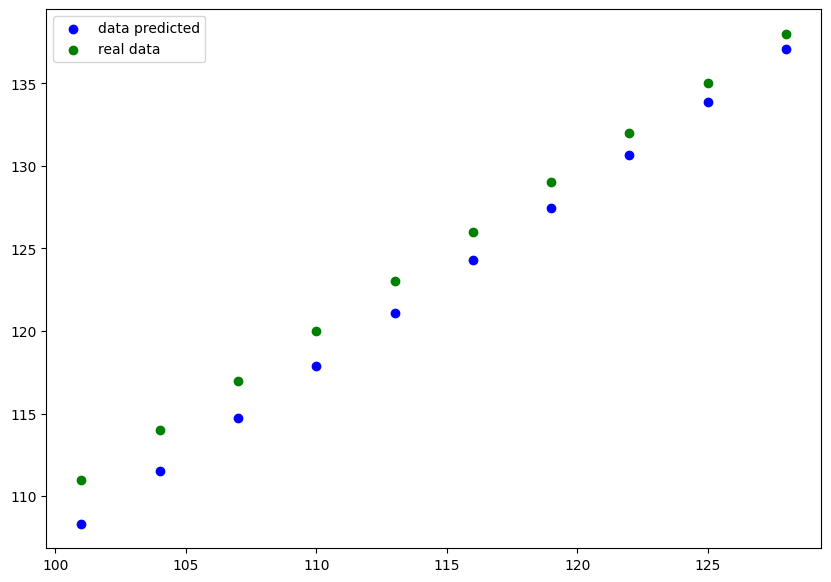

In [179]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, predictions, c="b", label="data predicted")
plt.scatter(X_test, y_test, c="g", label="real data")
plt.legend()

In [181]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [192]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [185]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [186]:
# set random seed
tf.random.set_seed(42)

# set callback earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

# 1. create model
model_boston = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. compile model
model_boston.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     metrics=["mae"])

# 3. fit model
history = model_boston.fit(X_train, y_train, epochs=200, callbacks=[callback])

Epoch 1/200
13/13 [==============================] - 2s 4ms/step - loss: 352.1031 - mae: 352.1031
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 46.4326 - mae: 46.4326
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 15.7408 - mae: 15.7408
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 10.3897 - mae: 10.3897
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 7.0130 - mae: 7.0130
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 6.3836 - mae: 6.3836
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 5.8887 - mae: 5.8887
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 5.9084 - mae: 5.9084
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 7.1859 - mae: 7.1859
Epoch 10/200
13/13 [==============================] - 0s 4ms/step - loss: 6.4752 - mae: 6.4752


In [187]:
model_boston.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 6.8275 - mae: 6.8275


[6.827537536621094, 6.827537536621094]

In [190]:
predictions = model_boston.predict(X_test)

4/4 [==============================] - 0s 3ms/step
